# Data preparation

In [269]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import umap
from sklearn.decomposition import PCA

In [22]:
from mofdscribe.datasets.thermal_stability_dataset import ThermalStabilityDataset
from mofdscribe.datasets.qmof_dataset import QMOFDataset
from mofdscribe.datasets.core_dataset import CoREDataset

In [113]:
def cosine(a, b):
    cos = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return cos

In [23]:
therm_ds = ThermalStabilityDataset()
qmof_ds = QMOFDataset()
core_ds = CoREDataset()

In [374]:
no_exist = []
for cif in list(therm_df['info.CoRE_name'].values):
    try:
        shutil.copy(
            '../data/meta/application_ori/%s.pt' %cif,
            '../data/meta/therm/%s.pt' %cif
        )
    except:
        no_exist.append(cif)

In [407]:
len(qmof_ds._df), len(therm_ds._df), len(core_ds._df)

(14906, 1756, 2056)

In [408]:
common = []
for name in qmof_ds._df["info.basename"]:
    if not (name in core_ds._df["info.basename"].values):
        if  (name in therm_ds._df["info.basename"].values):
            common.append(name)

In [73]:
len(common)

207

In [409]:
qmof_df = qmof_ds._df.copy()
core_df = core_ds._df.copy()
therm_df = therm_ds._df.copy()

In [410]:
qmof_df = qmof_df[
    [
        "info.basename", 
        "info.qmof_id", 
        "outputs.pbe.bandgap", 
        "outputs.pbe.energy_total", 
        "outputs.pbe.energy_elec", 
        "outputs.CH4-henry_coefficient-mol--kg--Pa", 
        "outputs.CH4-adsorption_energy-kJ--mol", 
        "outputs.CO2-adsorption_energy-kJ--mol", 
        "outputs.CO2-henry_coefficient-mol--kg--Pa", 
        "info.density",
        "info.pld",
        "info.lcd",
        "info.volume"
     ]
]

In [411]:
core_df = core_df[
    [
        "info.basename", "info.name", "outputs.logKH_CO2", "outputs.logKH_CH4", "info.density",
        "outputs.pure_uptake_CO2_298.00_15000", "outputs.pure_uptake_CO2_298.00_1600000",
        "outputs.pure_uptake_methane_298.00_580000", "outputs.pure_uptake_methane_298.00_6500000",
        "outputs.pure_CO2_widomHOA", "outputs.pure_methane_widomHOA"
    ]
]

In [412]:
therm_df = therm_df[["info.basename", "info.CoRE_name", "outputs.assigned_T_decomp", "info.density", "info.r_factor"]]

In [413]:
len(qmof_df), len(core_df), len(therm_df)

(14906, 2056, 1756)

In [439]:
df = qmof_df.merge(core_df, on="info.basename", how="outer")
df = df.merge(therm_df, on="info.basename", how="outer")

In [440]:
df['merged_density'] = df['info.density'].fillna(df['info.density_x']).fillna(df['info.density_y'])

In [444]:
df.drop(columns=["info.density", "info.density_x", "info.density_y"], inplace=True)

In [445]:
df.rename(columns={"merged_density": "info.density"}, inplace=True)

In [456]:
cif_names = []
for i, row in df.iterrows():
    if pd.isna(row["info.name"]):
        if pd.isna(row["info.CoRE_name"]):
            name = row["info.qmof_id"]
        else:
            name = row["info.CoRE_name"]
    else:
        name = row["info.name"]
    cif_names.append(name)

df["info.cifname"] = cif_names

In [454]:
df['outputs.pure_CO2_widomHOA'] = np.abs(df['outputs.pure_CO2_widomHOA'])
df['outputs.pure_methane_widomHOA'] = np.abs(df['outputs.pure_methane_widomHOA'])

In [457]:
df.to_csv("../data/application_v2.csv")

## Select test dataset from 99 overlap structures

In [3]:
from sklearn.model_selection import train_test_split

In [35]:
overlap99 = []
for cif in qmof_df["info.basename"].values:
    if cif in therm_df["info.basename"].values:
        if cif in core_df["info.basename"].values:
            overlap99.append(cif)

In [38]:
overlap_df = df[df["info.basename"].isin(overlap99)]

In [41]:
df_train, df_test = train_test_split(overlap_df, test_size=0.2, random_state=1840)

In [46]:
df_test["info.name"].values

array(['OYEBIE_clean', 'EQUBUO_clean', 'XALTOV_clean', 'OVIDON_clean',
       'FODCEI_clean', 'OGECOU_clean', 'ILOTOT_clean', 'IMIDZB10_clean',
       'WOGHEG_clean', 'KOMJON_clean', 'NAJTEA_clean', 'KAJZIH_clean',
       'PATWOY_clean', 'DOGZIJ_clean', 'EDABOC_clean', 'WOBHOM_clean',
       'LITDAV_clean', 'WIFBAQ_clean', 'KUNRAO_clean', 'EYULOA_clean'],
      dtype=object)

In [44]:
import shutil
import os

In [47]:
for cif in df_test["info.name"].values:
    shutil.move(
        "../data/cifs/application/%s.cif" %cif,
        "../data/cifs/application_test"
    )

## Original codes

In [118]:
import shutil
import os

In [117]:
subdf = df[~df["info.name"].isna()]
len(subdf)

2056

In [128]:
for name in subdf["info.qmof_id"].values:
    shutil.copy(
        "/Users/xiaoqi/.data/mofdscribe/QMOF/v0.0.1/structures/%s.cif" %name,
        "../data/cifs/application/%s.cif" %name
    )

In [123]:
subdf = df[df["info.name"].isna() & ~(df["info.CoRE_name"].isna())]
len(subdf)

1099

In [148]:
import pandas as pd

In [54]:
cif_names = []
for i, row in df.iterrows():
    if pd.isna(row["info.name"]):
        if pd.isna(row["info.CoRE_name"]):
            name = row["info.qmof_id"]
        else:
            name = row["info.CoRE_name"]
    else:
        name = row["info.name"]
    cif_names.append(name)

In [55]:
df["info.cifname"] = cif_names

In [56]:
df.to_csv("../data/application.csv")

In [162]:
from pathlib import Path


In [171]:
cifs = os.listdir("../data/cifs/application/")

meta_qmof = [Path(i).stem for i in os.listdir('../data/meta/qmof/')]
meta_core = [Path(i).stem for i in os.listdir("../data/meta/rsm/")]
meta_md_core = [Path(i).stem for i in os.listdir("../data/meta/core_md/")]

In [172]:
unfound = []
for cif in cifs:
    basename = Path(cif).stem
    if basename in meta_qmof:
        shutil.copy(
            "../data/meta/qmof/%s.pt" %basename,
            "../data/meta/application/%s.pt" %basename
        )
    elif basename in meta_core:
        shutil.copy(
            "../data/meta/rsm/%s.pt" %basename,
            "../data/meta/application/%s.pt" %basename
        )
    elif basename in meta_md_core:
        shutil.copy(
            "../data/meta/core_md/%s.pt" %basename,
            "../data/meta/application/%s.pt" %basename
        )
    else:
        unfound.append(basename)

In [173]:
len(unfound)

1160

In [199]:
df = pd.read_csv("../data/application.csv")

In [6]:
binned_values = pd.qcut(df["outputs.logKH_CO2"], q=3, labels=["low", "medium", "high"])

In [7]:
df["binned_logKH_CO2"] = binned_values

In [36]:
import numpy as np
import math
import os

In [57]:
df_test = pd.read_csv("../data/application.csv").set_index("info.cifname")

# Application Recommendation

In [4]:
from gensim.models.doc2vec import Doc2Vec
from mofgraph2vec.featurize.mof2doc import MOF2doc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx

In [53]:
# original path: run-20230614_225931-2bticdz2

In [5]:
df = pd.read_csv("../data/application_v2.csv").set_index("info.cifname")

In [215]:
model = Doc2Vec.load("../experiments/workflow/wandb/run-20230703_131618-c68e5rc3/tmp/embedding_model.pt")

In [9]:
test_corpus_config = {
  "embed_label": True,
  "label_path": "../data/application.csv",
  "labels_to_embed": [
    "outputs.pbe.bandgap",
    "outputs.pbe.energy_elec",
    "outputs.logKH_CO2",
    "outputs.logKH_CH4",
    "outputs.assigned_T_decomp"  
    ],
  "id_column": "info.cifname",
  "wl_step": 2,
  "n_components": 2,
  "use_hash": False,
  "writing_style": "paragraph",
  "composition": False,
  "mode": "all",
  "embed_cif": False
}
"""
documents = MOF2doc(
    cif_path=["../data/cifs/application/"], **test_corpus_config
).get_documents()
"""
test_documents = MOF2doc(
    cif_path=["../data/cifs/application_ori/"], **test_corpus_config
).get_documents()

100%|██████████| 17561/17561 [00:26<00:00, 662.83it/s]


In [91]:
structure_pool = [doc.tags[0] for doc in test_documents]

In [537]:
def plot_matrix(m):
    plt.imshow(m, cmap='GnBu', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [538]:
def plot_graph(m):
    labels = list(range(len(m)))
    df = pd.DataFrame(m, index=labels, columns=labels)
    G = nx.from_pandas_adjacency(df)
    G.remove_edges_from(nx.selfloop_edges(G))
    plt.figure(figsize=(15, 15))
    nx.draw_networkx(G, nx.spring_layout(G), node_size=0, arrows=False, edge_color='lightgray', font_size=8)
    plt.show()

In [5]:
structure_key = [key for key in model.dv.index_to_key if ~("outputs" in key)]

In [38]:
structure_pool = [key for key in model.dv.index_to_key if ("outputs" not in key) & ("info" not in key)]

In [40]:
from tqdm import tqdm

In [41]:
similarity_matrix = []
for i in tqdm(structure_pool):
    row = []
    for j in structure_pool:
        sim = 1 - model.dv.distance(w1=i, w2=j)
        if sim < 0.98:
            sim = 0
        row.append(sim)
    similarity_matrix.append(row)

  0%|          | 0/17541 [00:00<?, ?it/s]

100%|██████████| 17541/17541 [1:19:11<00:00,  3.69it/s]  


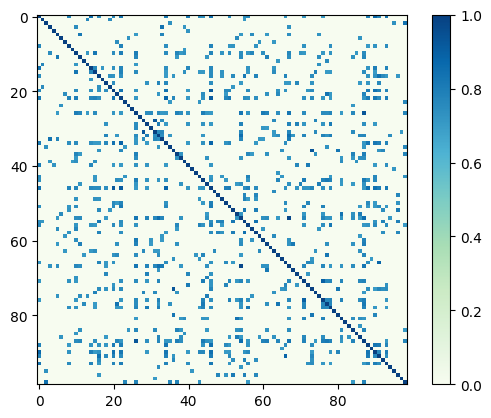

In [20]:
plot_matrix(similarity_matrix)

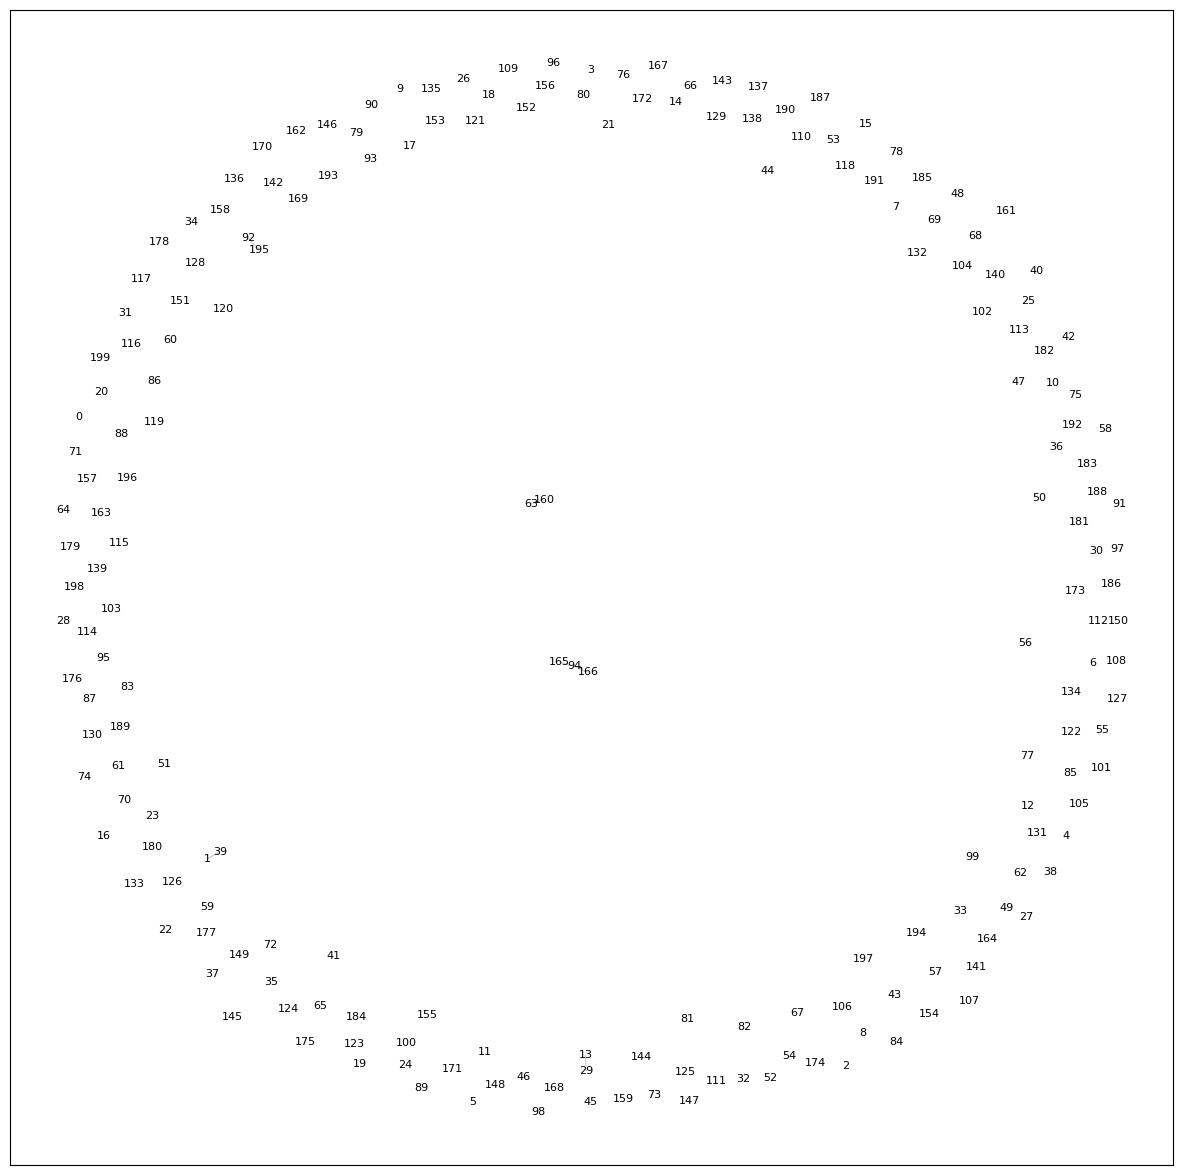

In [46]:
plot_graph(similarity_matrix)

In [318]:
tagged_documents = {doc.tags[0]: doc for doc in test_documents}
tags = list(tagged_documents.keys())

In [97]:
len(tags)

20

In [98]:
def similar_structure(which, n=3):
    if n == 'all':
        return model.dv.most_similar(
            positive=[model.infer_vector(tagged_documents[which][0])], topn=None
        )
    results = model.dv.most_similar(
        positive=[model.dv[tagged_documents[which][1][0]]], topn=n+17560
    )
    results = [(cif, score) for cif, score in results if (cif != tagged_documents[which][1][0]) & ("outputs" not in cif)]
    return results[:n]

In [123]:
similar_matrix = []
for i in test_documents:
    row = []
    for j in test_documents:
        row.append(
            model.similarity_unseen_docs(i.words, j.words, epochs=100)
        )
    similar_matrix.append(row)

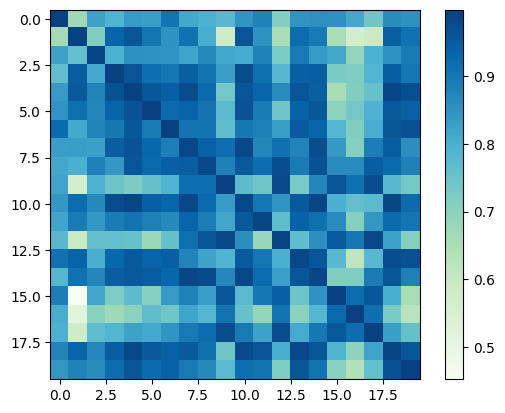

In [104]:
plot_matrix(similar_matrix)

In [504]:
labels = [
    "outputs.pbe.bandgap",
    #"outputs.pbe.energy_elec",
    #"outputs.pbe.energy_total",
    "outputs.logKH_CO2",
    "outputs.logKH_CH4",
    "outputs.assigned_T_decomp",
    #"outputs.pure_uptake_CO2_298.00_15000", 
    #"outputs.pure_uptake_CO2_298.00_1600000",
    #"outputs.pure_uptake_methane_298.00_580000", 
    #"outputs.pure_uptake_methane_298.00_6500000",
    #"outputs.pure_CO2_widomHOA", 
    #"outputs.pure_methane_widomHOA",
]
"""
similar_label = []
for i in test_documents:
    row = []
    for j in test_documents:
        v_i = df.loc[i.tags[0], labels].values
        v_j = df.loc[j.tags[0], labels].values
        row.append(
            cosine(v_i, v_j)
        )
    similar_label.append(row)
"""

'\nsimilar_label = []\nfor i in test_documents:\n    row = []\n    for j in test_documents:\n        v_i = df.loc[i.tags[0], labels].values\n        v_j = df.loc[j.tags[0], labels].values\n        row.append(\n            cosine(v_i, v_j)\n        )\n    similar_label.append(row)\n'

In [505]:
bin = ["high", "medium", "low"]
label_bins = [label+"_"+b for b in bin for label in labels]

In [506]:
labels_b = []
for label in labels:
    binned_values = pd.qcut(df.loc[:, label], q=3, labels=["low", "medium", "high"])
    labels_b.append("binned_%s" %label)
    df["binned_%s" %label] = binned_values

In [159]:
for i in test_documents:
    results = model.dv.most_similar(
        positive=[i.tags[0]], topn=17000
    )
    results = [(cif, score) for cif, score in results if ("outputs" in cif)]
    print(i.tags[0],results[:7])

XALTOV_clean [('outputs.pbe.energy_elec_low', -0.20088578760623932), ('outputs.pbe.energy_elec_medium', -0.21486856043338776), ('outputs.logKH_CH4_low', -0.22846180200576782), ('outputs.pbe.energy_elec_high', -0.231411412358284), ('outputs.logKH_CH4_medium', -0.2327975034713745), ('outputs.pbe.bandgap_low', -0.26453229784965515), ('outputs.pbe.bandgap_high', -0.26887768507003784)]
KUNRAO_clean [('outputs.pbe.bandgap_high', -0.2513803243637085), ('outputs.logKH_CH4_low', -0.2574532926082611), ('outputs.pbe.bandgap_medium', -0.26973065733909607), ('outputs.logKH_CH4_medium', -0.2705661356449127), ('outputs.logKH_CO2_medium', -0.2905363440513611), ('outputs.logKH_CO2_high', -0.2967905104160309), ('outputs.logKH_CH4_high', -0.298124760389328)]
KOMJON_clean [('outputs.logKH_CH4_low', -0.16476981341838837), ('outputs.pbe.bandgap_high', -0.21559855341911316), ('outputs.pbe.bandgap_medium', -0.24325275421142578), ('outputs.logKH_CO2_high', -0.259865939617157), ('outputs.logKH_CH4_medium', -0.2

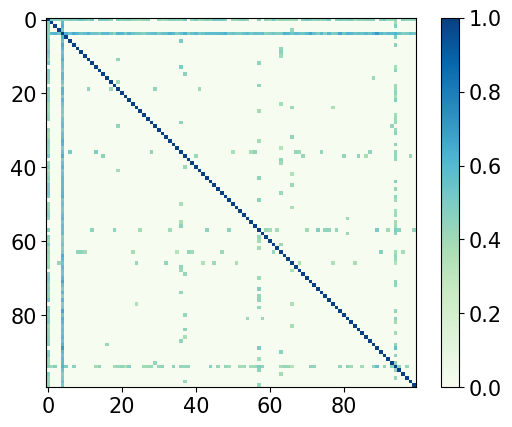

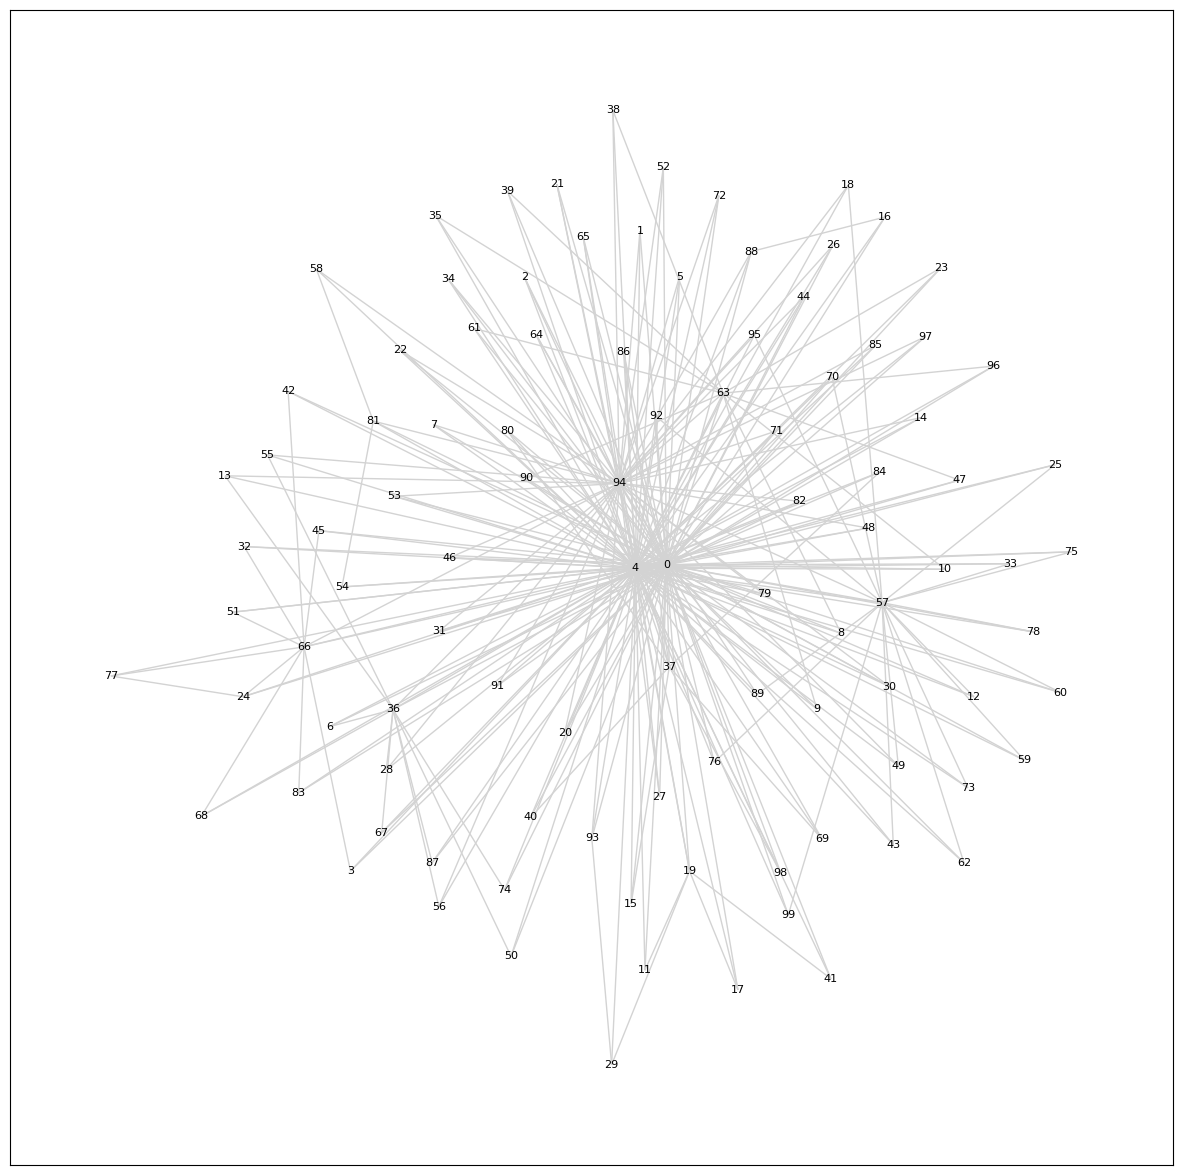

In [110]:
def similarity_matrix_top_n(n=3):
    m = [[0 for _ in range(len(documents[:100]))] for _ in range(len(documents[:100]))]
    for i, tag in enumerate(tags[:100]):
        sp = similar_structure(tag)
        idxs = [tags.index(p[0]) for p in sp]
        for k, j in enumerate(idxs):
            m[i][j] = sp[k][1]
            m[j][i] = sp[k][1]
        m[i][i] = 1.0
    return m

similarity_matrix_truncated = similarity_matrix_top_n(n=1)
plot_matrix(similarity_matrix_truncated)
plot_graph(similarity_matrix_truncated)

In [7]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

import matplotlib
matplotlib.rcParams['font.size'] = 15

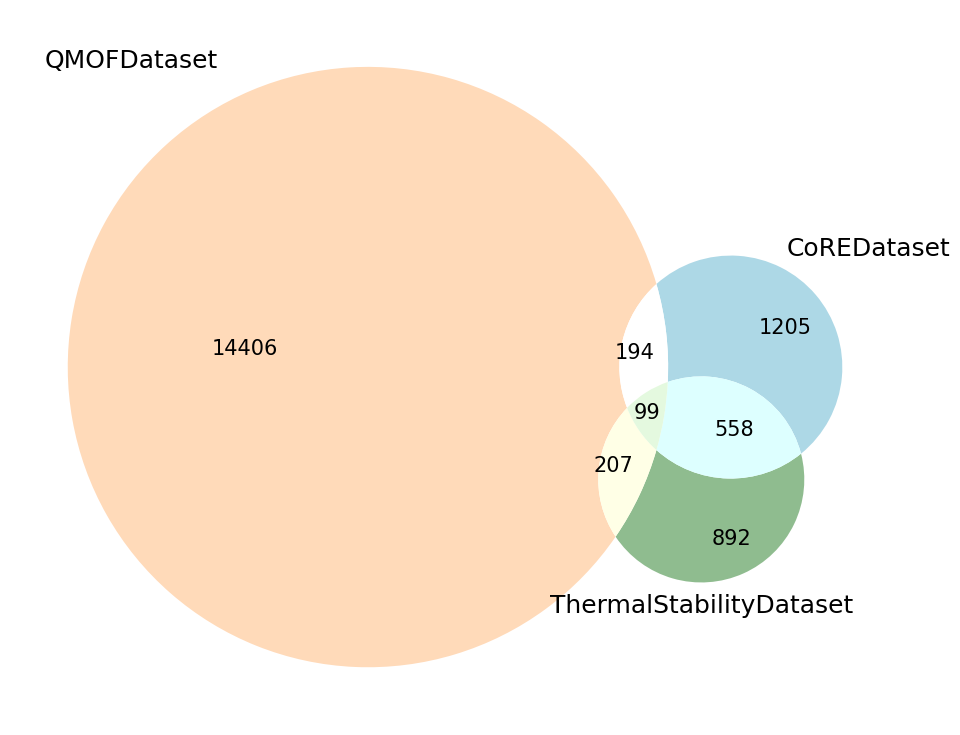

In [8]:
plt.figure(figsize=(10,10))
venn3(subsets=(14406,1205,194,892,207,558,99),
      set_colors=('peachpuff', 'lightblue', 'darkseagreen'), 
      set_labels = ('QMOFDataset', 
                    'CoREDataset',
                    'ThermalStabilityDataset'),
      alpha=1
      )
 
plt.tight_layout()
plt.savefig("../../../files/dataset.png", dpi=1200)
plt.show()

In [69]:
similarity_matrix = []
for i in common_structures:
    row = []
    for j in common_structures:
        sim = 1 - model.dv.distance(w1=i, w2=j)
        row.append(sim)
    similarity_matrix.append(row)

In [78]:
label_similarity_matrix = []
for i in common_structures:
    row = []
    v_i = df.loc[i, targets].values
    for j in common_structures:
        v_j = df.loc[j, targets].values
        sim = cosine(v_i, v_j)
        row.append(sim)
    label_similarity_matrix.append(row)

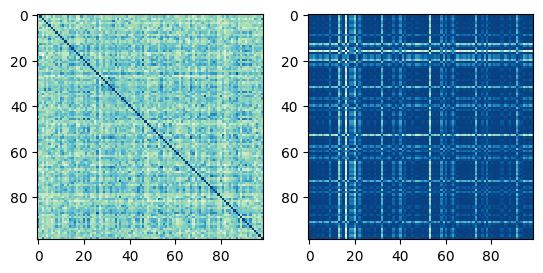

In [82]:
fig, axs = plt.subplots(1,2)

axs[0].imshow(similarity_matrix, cmap='GnBu', interpolation='nearest')
axs[1].imshow(label_similarity_matrix, cmap='GnBu', interpolation='nearest')

#axs[1].colorbar()
plt.show()

In [88]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def calculate_mse(matrix1, matrix2):
    mse = np.mean((matrix1 - matrix2) ** 2)
    return mse

def calculate_cosine_similarity(matrix1, matrix2):
    similarity = cosine_similarity(matrix1.reshape(1, -1), matrix2.reshape(1, -1))
    return similarity[0, 0]

# Example matrices
matrix1 = np.array(similarity_matrix)
matrix2 = np.array(label_similarity_matrix)

# Calculate MSE
mse = calculate_mse(matrix1, matrix2)
print("Mean Squared Error (MSE):", mse)

# Calculate cosine similarity
cosine_sim = calculate_cosine_similarity(matrix1, matrix2)
print("Cosine Similarity:", cosine_sim)

Mean Squared Error (MSE): 0.1891032594894927
Cosine Similarity: 0.9791078312742483


In [113]:
core_therm_structures = []
for i in range(len(documents)):
    if len(documents[i].tags) == 2:
        core_therm_structures.append(documents[i].tags[0])

In [114]:
len(core_therm_structures)

892

In [115]:
similarity_matrix = []
for i in core_therm_structures:
    row = []
    for j in core_therm_structures:
        sim = 1 - model.dv.distance(w1=i, w2=j)
        row.append(sim)
    similarity_matrix.append(row)

target_new = ["outputs.assigned_T_decomp"]
label_similarity_matrix = []
for i in core_therm_structures:
    row = []
    v_i = df.loc[i, target_new].values
    for j in core_therm_structures:
        v_j = df.loc[j, target_new].values
        sim = cosine(v_i, v_j)
        row.append(sim)
    label_similarity_matrix.append(row)

In [297]:
# Example matrices
matrix1 = np.array(similarity_matrix)
matrix2 = np.array(label_similarity_matrix)

# Calculate MSE
mse = calculate_mse(matrix1, matrix2)
print("Mean Squared Error (MSE):", mse)

# Calculate cosine similarity
cosine_sim = calculate_cosine_similarity(matrix1, matrix2)
print("Cosine Similarity:", cosine_sim)

NameError: name 'similarity_matrix' is not defined

In [492]:
trained_cifs = df["info.cifname"].values

In [493]:
embedding_arrays = [model.dv[cif] for cif in trained_cifs]
embedding_arrays.append(model.dv["outputs.pbe.bandgap_low"])
embedding_arrays.append(model.dv["outputs.pbe.bandgap_medium"])
embedding_arrays.append(model.dv["outputs.pbe.bandgap_high"])

embedding_arrays = np.array(embedding_arrays)

In [497]:
embedding_bg = np.array([df.loc[cif, "outputs.pbe.bandgap"] for cif in trained_cifs])

In [498]:
embedding_kh_co2 = np.array([df.loc[cif, "outputs.logKH_CO2"] for cif in trained_cifs])
embedding_kh_ch4 = np.array([df.loc[cif, "outputs.logKH_CH4"] for cif in trained_cifs])
embedding_com_T = np.array([df.loc[cif, "outputs.assigned_T_decomp"] for cif in trained_cifs])

In [499]:
tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=50, random_state=1414, n_jobs=-1)
X_2d = tsne.fit_transform(embedding_arrays)

In [299]:
reducer = umap.UMAP(n_neighbors=500, n_components=2, min_dist=0.25, random_state=1840)
X_2d = reducer.fit_transform(embedding_arrays)

In [500]:
nan_idx_bg = np.isnan(embedding_bg)
val_idx_bg = ~np.isnan(embedding_bg)

nan_idx_co2 = np.isnan(embedding_kh_co2)
val_idx_co2 = ~np.isnan(embedding_kh_co2)

nan_idx_ch4 = np.isnan(embedding_kh_ch4)
val_idx_ch4 = ~np.isnan(embedding_kh_ch4)

nan_idx_T = np.isnan(embedding_com_T)
val_idx_T = ~np.isnan(embedding_com_T)

In [519]:
colors = {0:'lightgrey', 'high':'green', 'medium':'blue', 'low':'yellow'}

In [520]:
color_list = ['lightgrey' if pd.isna(x) else x for x in list(df.loc[:,"binned_outputs.logKH_CO2"].map(colors))]

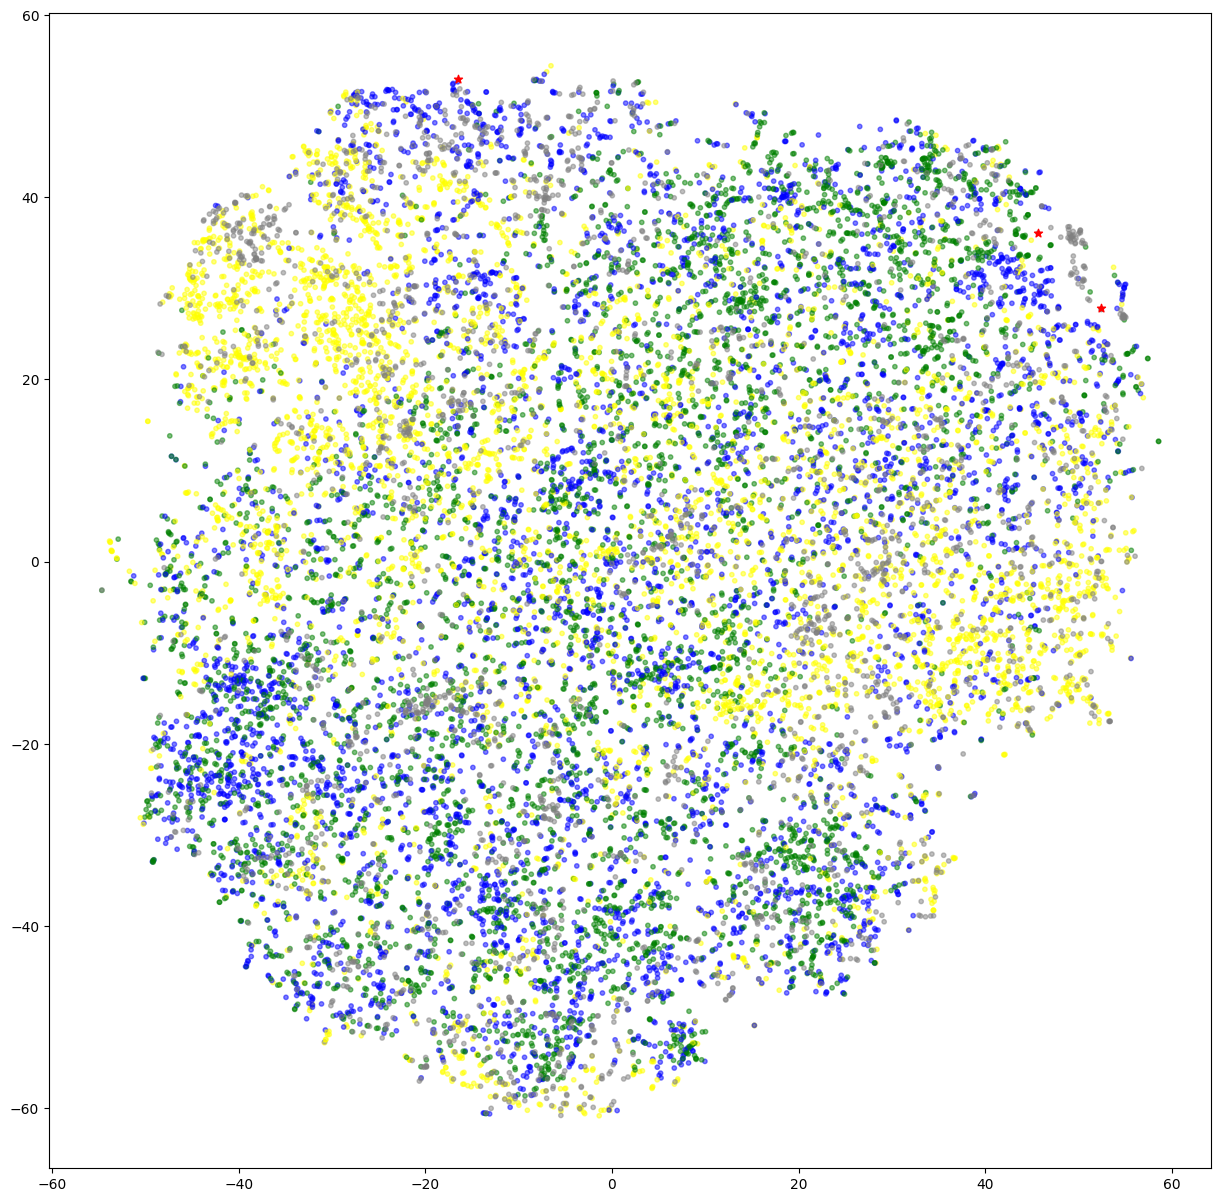

In [509]:
# Create colormap
plt.figure(figsize=(15,15))
#cmap = plt.cm.get_cmap('viridis')

# Create scatter plot with colored points
plt.scatter(X_2d[:-3, 0], X_2d[:-3, 1], c=color_list, s=10, alpha=0.5)

# Assign grey color to missing values
plt.scatter(X_2d[-3:, 0], X_2d[-3:, 1], marker="*", color='red')

/var/folders/gt/tsyp2wjd1ng0pkr1tf52kn600000gn/T/ipykernel_3578/1040978514.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')
/var/folders/gt/tsyp2wjd1ng0pkr1tf52kn600000gn/T/ipykernel_3578/1040978514.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_2d[:-3, 0], X_2d[:-3, 1], c=color_list, cmap=cmap, s=10, alpha=0.5)


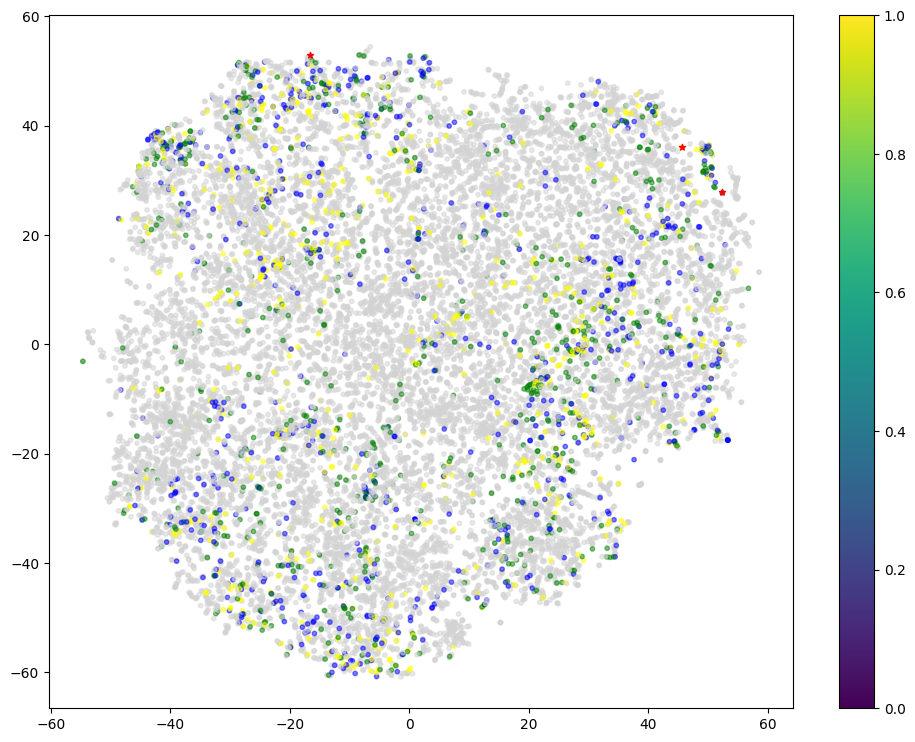

In [522]:
# Create colormap
plt.figure(figsize=(12,9))
cmap = plt.cm.get_cmap('viridis')

# Create scatter plot with colored points
plt.scatter(X_2d[:-3, 0], X_2d[:-3, 1], c=color_list, cmap=cmap, s=10, alpha=0.5)

plt.scatter(X_2d[-3:, 0], X_2d[-3:, 1], marker="*", s=20, color='red')
plt.colorbar()

/var/folders/gt/tsyp2wjd1ng0pkr1tf52kn600000gn/T/ipykernel_7514/4249977419.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


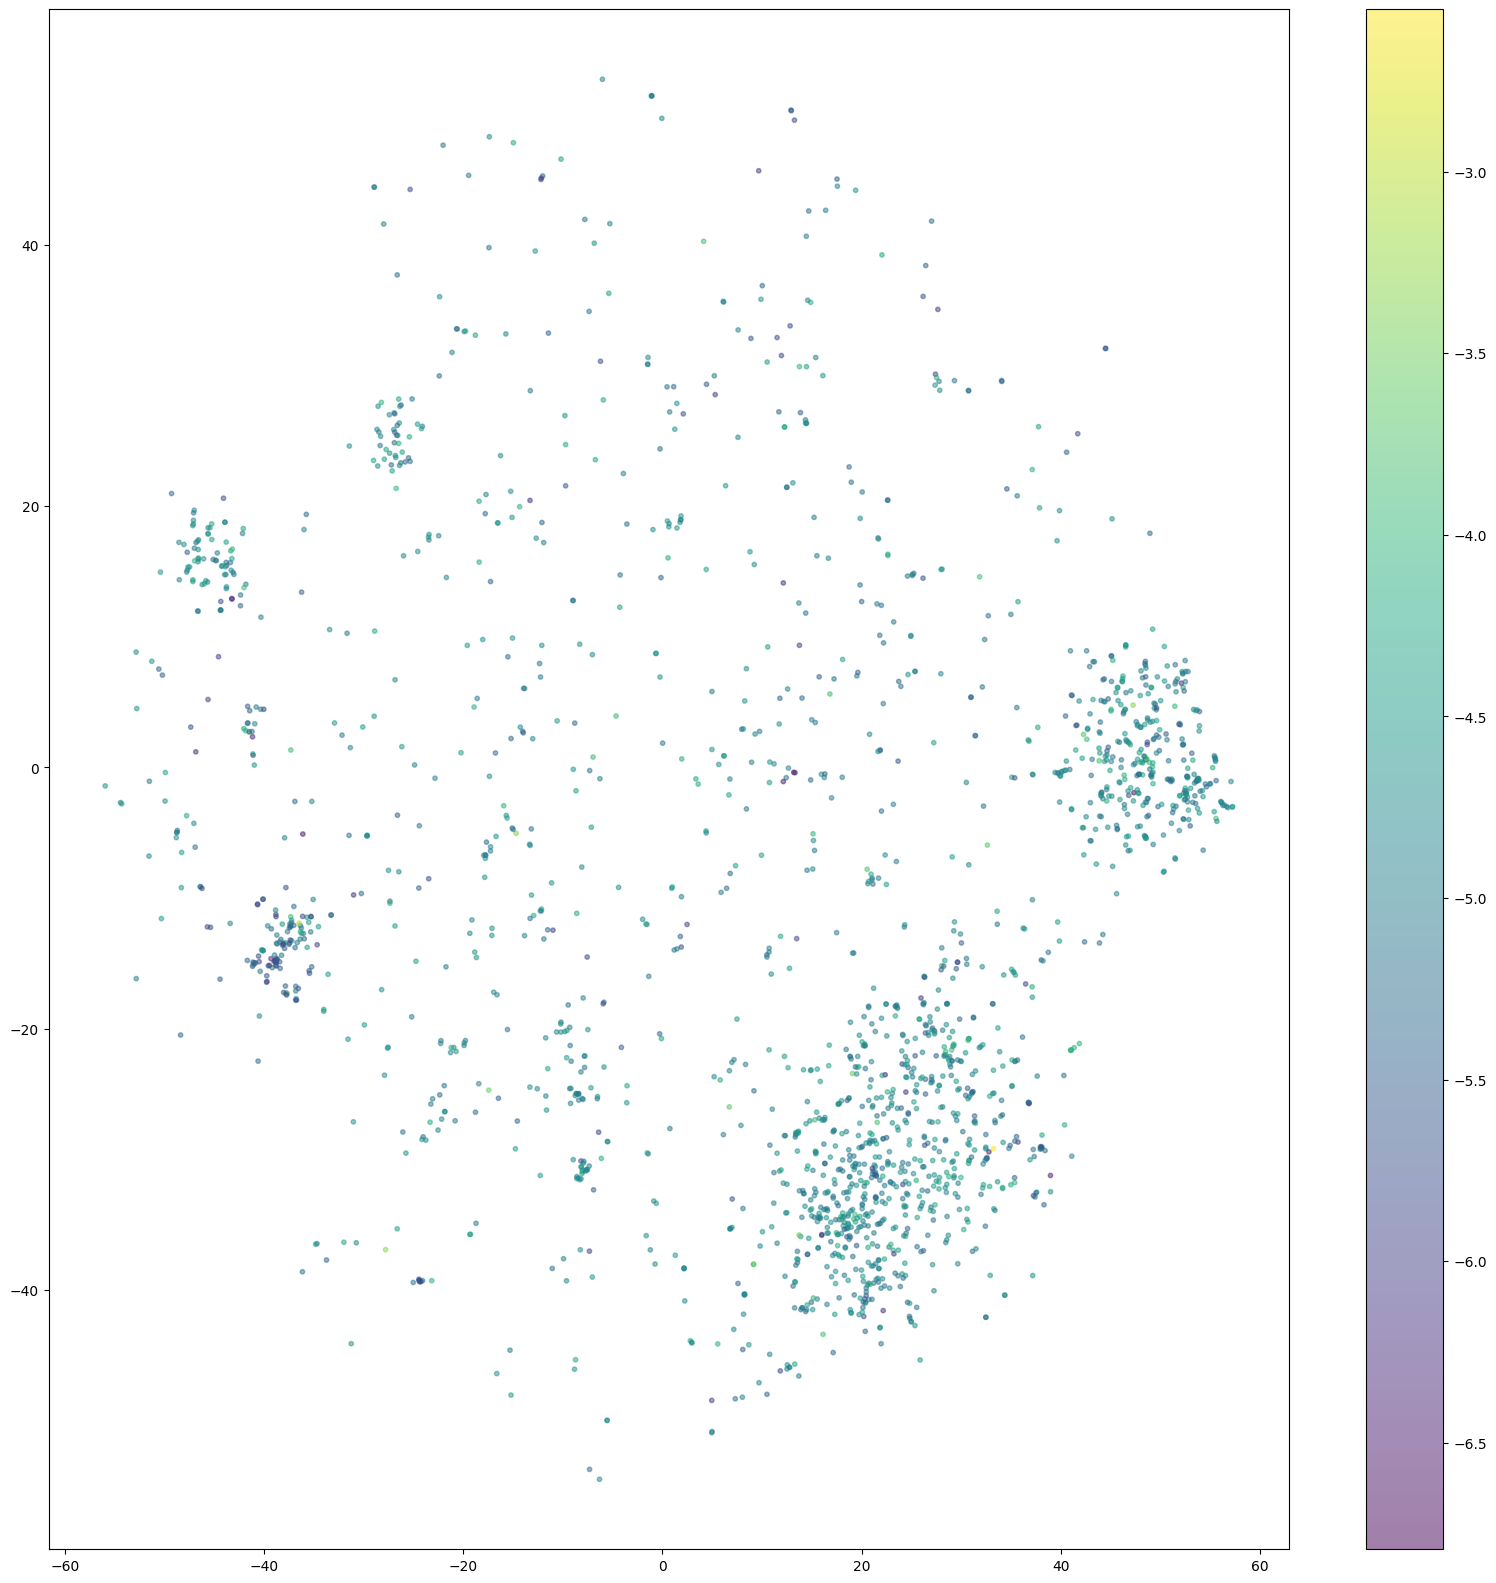

In [68]:
# Create colormap
plt.figure(figsize=(20,20))
cmap = plt.cm.get_cmap('viridis')

# Create scatter plot with colored points
plt.scatter(X_2d[val_idx_ch4, 0], X_2d[val_idx_ch4, 1], c=embedding_kh_ch4[val_idx_ch4], cmap=cmap, s=10, alpha=0.5)

# Assign grey color to missing values
#plt.scatter(X_2d[nan_idx, 0], X_2d[nan_idx, 1], color='grey', alpha=0.5, s=10)
plt.colorbar()

In [486]:
# bandgap model: offline-run-20230703_233211-zhetgs1n
# bandgap & logKH_CO2: offline-run-20230704_160942-ig8rjc2p
# bandgap & logKH_CO2 & logKH_CH4: offline-run-20230704_170040-8yeh8hgo
model = Doc2Vec.load("../experiments/workflow/wandb/offline-run-20230704_170040-8yeh8hgo/tmp/embedding_model.pt")

In [572]:
kpi_names = [key for key in model.dv.index_to_key if ("outputs" in key) | ("info" in key)]
kpi_vectors = np.array([model.dv[kpi] for kpi in kpi_names])

In [573]:
pca = PCA(n_components=40, random_state=2023)
kpi_tsne = pca.fit_transform(kpi_vectors)
tsne = TSNE(n_components=2, perplexity=3, early_exaggeration=4, random_state=3388, n_jobs=-1)
kpi_2d = tsne.fit_transform(kpi_tsne)

In [581]:
kpi_name_tune_dict = {
    'info.density_low': 'Density',
    'info.density_medium': 'Density',
    'info.density_high': 'Density',
    'info.pld_low': 'PLD',
    'info.pld_medium': 'PLD',
    'info.pld_high': 'PLD',
    'info.lcd_low': 'LCD',
    'info.lcd_medium': 'LCD',
    'info.lcd_high': 'LCD',
    'outputs.pbe.bandgap_low': 'Bandgap',
    'outputs.pbe.bandgap_medium': 'Bandgap',
    'outputs.pbe.bandgap_high': 'Bandgap',
    'outputs.pbe.energy_total_low': 'Energy',
    'outputs.pbe.energy_total_medium': 'Energy',
    'outputs.pbe.energy_total_high': 'Energy',
    'outputs.logKH_CO2_low': '$CO_2\ k_H$',
    'outputs.logKH_CO2_medium': '$CO_2\ k_H$',
    'outputs.logKH_CO2_high': '$CO_2\ k_H$',
    'outputs.pure_CO2_widomHOA_low': '$CO_2$ HOA',
    'outputs.pure_CO2_widomHOA_medium': '$CO_2$ HOA',
    'outputs.pure_CO2_widomHOA_high': '$CO_2$ HOA',
    'outputs.pure_uptake_CO2_298.00_15000_low': '$CO_2$ uptake (0.15 bar 298 K)',
    'outputs.pure_uptake_CO2_298.00_15000_medium': '$CO_2$ uptake (0.15 bar 298 K)',
    'outputs.pure_uptake_CO2_298.00_15000_high': '$CO_2$ uptake (0.15 bar 298 K)',
    'outputs.pure_uptake_CO2_298.00_1600000_low': '$CO_2$ uptake (16 bar 298 K)',
    'outputs.pure_uptake_CO2_298.00_1600000_medium': '$CO_2$ uptake (16 bar 298 K)',
    'outputs.pure_uptake_CO2_298.00_1600000_high': '$CO_2$ uptake (16 bar 298 K)',
    'outputs.logKH_CH4_low': '$CH_4\ k_H$ ',
    'outputs.logKH_CH4_medium': '$CH_4\ k_H$',
    'outputs.logKH_CH4_high': '$CH_4\ k_H$',
    'outputs.pure_methane_widomHOA_low': '$CH_4$ HOA',
    'outputs.pure_methane_widomHOA_medium': '$CH_4$ HOA',
    'outputs.pure_methane_widomHOA_high': '$CH_4$ HOA',
    'outputs.pure_uptake_methane_298.00_580000_low': '$CH_4$ uptake (5.8 bar 298 K)',
    'outputs.pure_uptake_methane_298.00_580000_medium': '$CH_4$ uptake (5.8 bar 298 K)',
    'outputs.pure_uptake_methane_298.00_580000_high': '$CH_4$ uptake (5.8 bar 298 K)',
    'outputs.pure_uptake_methane_298.00_6500000_low': '$CH_4$ uptake (65 bar 298 K)',
    'outputs.pure_uptake_methane_298.00_6500000_medium': '$CH_4$ uptake (65 bar 298 K)',
    'outputs.pure_uptake_methane_298.00_6500000_high': '$CH_4$ uptake (65 bar 298 K)',
    'outputs.assigned_T_decomp_low': 'Decomposition T',
    'outputs.assigned_T_decomp_medium': 'Decomposition T',
    'outputs.assigned_T_decomp_high': 'Decomposition T',
}

In [582]:
kpi_names_tuned = [kpi_name_tune_dict[kpi] for kpi in kpi_names]

In [575]:
markers = [
    'o' if 'high' in tag else 's' if 'medium' in tag else '^' for tag in kpi_names 
]
colors = [
    'red' if 'CO2' in kpi else 'orange' if 'methane' in kpi else 'orange' if 'CH4' in kpi else 'pink' if 'T' in kpi else 'blue' if 'pbe' in kpi else 'green' for kpi in kpi_names
]

In [576]:
from adjustText import adjust_text

In [577]:
import matplotlib.lines as mlines
high_mk = mlines.Line2D([], [], marker='o', label='High', linestyle='None', color='grey')
medium_mk = mlines.Line2D([], [], marker='s', label='Medium', linestyle='None', color='grey')
low_mk = mlines.Line2D([], [], marker='^', label='Low', linestyle='None', color='grey')

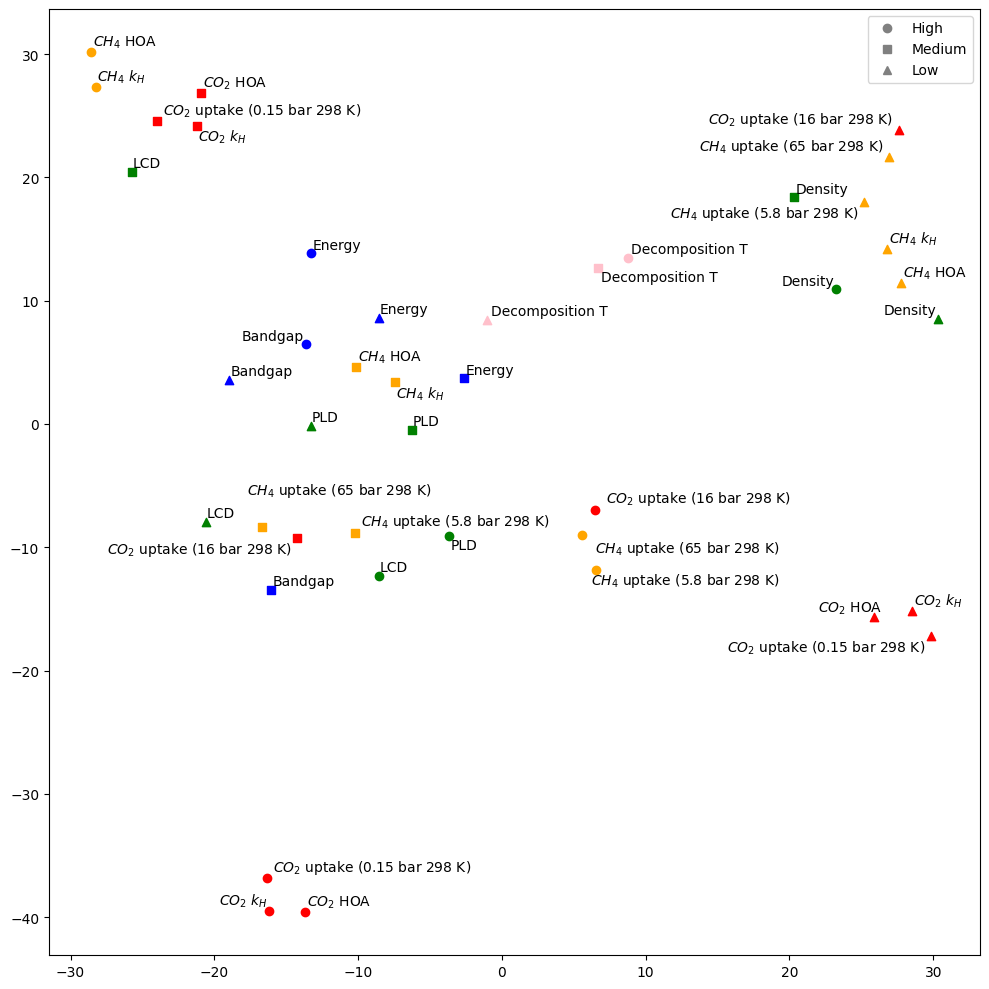

In [586]:
plt.figure(figsize=(10, 10))

texts = []
for i, kpi in enumerate(kpi_names_tuned):
    plt.scatter(kpi_2d[i,0], kpi_2d[i,1], marker=markers[i], c=colors[i])
    texts.append(plt.annotate(kpi, (kpi_2d[:,0][i], kpi_2d[:,1][i]), fontsize=10))

plt.legend(handles=[high_mk, medium_mk, low_mk])
adjust_text(texts) #, arrowprops=dict(arrowstyle='-'))
plt.tight_layout()
#plt.savefig("../../../files/final_v/5-tsne.png", dpi=1200)

# Calculate test accuracy

In [29]:
model = Doc2Vec.load("../experiments/workflow/wandb/run-20230629_224531-t54ir5b8/tmp/embedding_model.pt")

In [143]:
embed_labels = [
    "outputs.pbe.bandgap",
    "outputs.pbe.energy_elec",
    #"outputs.pbe.energy_total",
    "outputs.logKH_CO2",
    "outputs.logKH_CH4",
    "outputs.assigned_T_decomp",
    #"info.pld",
    #"info.lcd",
    #"info.volume",
    #"outputs.pure_uptake_CO2_298.00_15000", 
    #"outputs.pure_uptake_CO2_298.00_1600000",
    #"outputs.pure_uptake_methane_298.00_580000", 
    #"outputs.pure_uptake_methane_298.00_6500000",
    "outputs.pure_CO2_widomHOA", 
    "outputs.pure_methane_widomHOA",
    #"info.r_factor"
]

embed_labels_col = ["binned_%s" %label for label in embed_labels]

In [145]:
df_label = pd.read_csv("../data/application_v2.csv").set_index("info.cifname")

for label in embed_labels:
    binned_values = pd.qcut(df_label.loc[:, label], q=3, labels=["low", "medium", "high"])
    df_label["binned_%s" %label] = binned_values

In [128]:
def build_test_vocab(model, test_doc):
    for test in test_doc:
        cifname = test.tags[0]
        vector = model.infer_vector(test.words)
        model.dv.add_vector(
            key=cifname,
            vector=vector
        )

In [129]:
build_test_vocab(model, test_documents)

/Users/xiaoqi/opt/miniconda3/envs/mofgraph2vec/lib/python3.8/site-packages/gensim/models/keyedvectors.py:551: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  warnings.warn(


In [191]:
def get_test_values(model, test_doc, labels_to_eva):
    predict_bin = []
    for test in test_doc:
        cifname = test.tags[0]
        label_bin = [cifname]
        
        results = model.dv.most_similar(
            positive=[cifname], topn=len(model.dv)
        )
        results = [(word, score) for word, score in results if ("outputs" in word) & ("high" in word)]
        
        idx = 0
        while results[idx][1] > -0.1:
            label_bin.append(results[idx][0])
            idx += 1
        predict_bin.append(label_bin)
    
    return predict_bin
"""
        for label in labels_to_eva:
            idx = 0
            while not label in results[idx][0]:
                idx += 1
            bin = results[idx][0].split("_")[-2]
            label_bin.append(bin)
        predict_bin.append(label_bin)

    return predict_bin
"""

'\n        for label in labels_to_eva:\n            idx = 0\n            while not label in results[idx][0]:\n                idx += 1\n            bin = results[idx][0].split("_")[-2]\n            label_bin.append(bin)\n        predict_bin.append(label_bin)\n\n    return predict_bin\n'

In [192]:
model_bin = get_test_values(model, test_documents, embed_labels)

In [523]:
model.dv.most_similar(positive=['outputs.pbe.bandgap_high'])

[('qmof-af52ec1', 0.8629044890403748),
 ('qmof-1779479', 0.8341093063354492),
 ('qmof-86c865b', 0.8238844871520996),
 ('qmof-84be34f', 0.8230255842208862),
 ('qmof-cc5aa5e', 0.8200337290763855),
 ('qmof-9cf2bad', 0.8095086812973022),
 ('qmof-c93d7b2', 0.8090723752975464),
 ('qmof-e6fbd50', 0.8086627721786499),
 ('qmof-6203b43', 0.8074404001235962),
 ('qmof-a8bfcf3', 0.8040764927864075)]

In [224]:
df_label.loc['qmof-0b7af5b', "binned_outputs.pbe.bandgap"]

'low'

In [193]:
model_bin

[['XALTOV_clean',
  'outputs.pure_CO2_widomHOA_high',
  'outputs.pure_methane_widomHOA_high',
  'outputs.assigned_T_decomp_high',
  'outputs.logKH_CO2_high'],
 ['KUNRAO_clean', 'outputs.pbe.bandgap_high'],
 ['KOMJON_clean',
  'outputs.pbe.bandgap_high',
  'outputs.pure_methane_widomHOA_high',
  'outputs.pure_CO2_widomHOA_high'],
 ['WOBHOM_clean', 'outputs.pure_CO2_widomHOA_high'],
 ['WIFBAQ_clean'],
 ['EDABOC_clean', 'outputs.pbe.bandgap_high'],
 ['NAJTEA_clean', 'outputs.assigned_T_decomp_high', 'outputs.logKH_CO2_high'],
 ['DOGZIJ_clean'],
 ['OYEBIE_clean'],
 ['OGECOU_clean',
  'outputs.pure_CO2_widomHOA_high',
  'outputs.pure_methane_widomHOA_high',
  'outputs.logKH_CH4_high',
  'outputs.assigned_T_decomp_high'],
 ['WOGHEG_clean'],
 ['IMIDZB10_clean',
  'outputs.pbe.bandgap_high',
  'outputs.pure_CO2_widomHOA_high'],
 ['ILOTOT_clean',
  'outputs.pure_CO2_widomHOA_high',
  'outputs.logKH_CO2_high',
  'outputs.pure_methane_widomHOA_high',
  'outputs.logKH_CH4_high',
  'outputs.pbe.ban

In [152]:
test_cifs = [test.tags[0] for test in test_documents]

In [153]:
total = 0
correct = 0
for cif_idx in range(len(test_cifs)):
    for label_idx in range(len(embed_labels)):
        if df_label.loc[test_cifs, labels_b].values[cif_idx][label_idx] == model_bin[cif_idx][label_idx+1]:
            correct += 1
        total += 1

IndexError: list index out of range

In [101]:
correct/total

0.39

In [39]:
# offline-run-20230628_083310-7b1p9h6c: 0.28
# origin: 0.47
# offline-run-20230628_093622-sfstlrrw: 0.39

In [146]:
df_label.loc[test_cifs, embed_labels_col]

,binned_outputs.pbe.bandgap,binned_outputs.pbe.energy_elec,binned_outputs.logKH_CO2,binned_outputs.logKH_CH4,binned_outputs.assigned_T_decomp,binned_outputs.pure_CO2_widomHOA,binned_outputs.pure_methane_widomHOA
info.cifname,,,,,,,
XALTOV_clean,low,low,low,low,high,high,high
KUNRAO_clean,medium,low,medium,high,medium,medium,low
KOMJON_clean,high,low,low,low,medium,high,low
WOBHOM_clean,high,low,low,medium,medium,high,high
WIFBAQ_clean,low,low,medium,medium,low,medium,medium
EDABOC_clean,high,high,medium,high,medium,medium,low
NAJTEA_clean,medium,low,high,high,medium,low,medium
DOGZIJ_clean,medium,medium,medium,high,medium,high,low
OYEBIE_clean,high,low,medium,high,medium,medium,low


In [158]:
subset = df_label.loc[test_cifs, embed_labels_col]

In [163]:
np.array(subset.apply(lambda row: row[row == 'high'].index, axis=1).values)

array([Index(['binned_outputs.assigned_T_decomp', 'binned_outputs.pure_CO2_widomHOA',
              'binned_outputs.pure_methane_widomHOA'],
             dtype='object')                                                         ,
       Index(['binned_outputs.logKH_CH4'], dtype='object'),
       Index(['binned_outputs.pbe.bandgap', 'binned_outputs.pure_CO2_widomHOA'], dtype='object'),
       Index(['binned_outputs.pbe.bandgap', 'binned_outputs.pure_CO2_widomHOA',
              'binned_outputs.pure_methane_widomHOA'],
             dtype='object')                                                   ,
       Index([], dtype='object'),
       Index(['binned_outputs.pbe.bandgap', 'binned_outputs.pbe.energy_elec',
              'binned_outputs.logKH_CH4'],
             dtype='object')                                                 ,
       Index(['binned_outputs.logKH_CO2', 'binned_outputs.logKH_CH4'], dtype='object'),
       Index(['binned_outputs.logKH_CH4', 'binned_outputs.pure_CO2_widomHOA'

In [166]:
model_bin

[['XALTOV_clean'],
 ['KUNRAO_clean'],
 ['KOMJON_clean'],
 ['WOBHOM_clean'],
 ['WIFBAQ_clean'],
 ['EDABOC_clean'],
 ['NAJTEA_clean'],
 ['DOGZIJ_clean'],
 ['OYEBIE_clean'],
 ['OGECOU_clean'],
 ['WOGHEG_clean'],
 ['IMIDZB10_clean'],
 ['ILOTOT_clean'],
 ['LITDAV_clean'],
 ['PATWOY_clean'],
 ['KAJZIH_clean'],
 ['EQUBUO_clean'],
 ['EYULOA_clean'],
 ['FODCEI_clean'],
 ['OVIDON_clean']]

# Popular MOFs

In [ ]:
# MOF-74: qmof-42b6d9f, ORIWET_clean, LENKIA_clean
# MIL-53: DONNAW_clean, DONNEA_clean, DOYBEA_clean
# HKUST-1: OQIZUL_clean

In [527]:
model.dv.most_similar(['LENKIA_clean'])

[('FABGOG_clean', 0.9850220084190369),
 ('QONLIQ_clean', 0.9710085391998291),
 ('HUDWUA_clean', 0.9686818718910217),
 ('qmof-c468324', 0.9659872651100159),
 ('GUMBIA_clean', 0.9646715521812439),
 ('PAZXUJ_clean', 0.9634952545166016),
 ('YUNJIB_clean', 0.960257351398468),
 ('DANROC_clean', 0.9600465893745422),
 ('EJOZOU_clean', 0.9585898518562317),
 ('qmof-77e8a1f', 0.9584600925445557)]

In [297]:
target_kpis = [
    'outputs.pbe.bandgap_high', 'outputs.pbe.bandgap_medium', 'outputs.pbe.bandgap_low',
    'outputs.logKH_CO2_high', 'outputs.logKH_CO2_medium', 'outputs.logKH_CO2_low',
    'outputs.logKH_CH4_high', 'outputs.logKH_CH4_medium', 'outputs.logKH_CH4_low',
    'outputs.assigned_T_decomp_high', 'outputs.assigned_T_decomp_medium', 'outputs.assigned_T_decomp_low',
]

In [525]:
for kpi in target_kpis:
    print(model.dv.distance('ORIWET_clean', kpi))

1.3641248941421509
1.2730635404586792
0.4769206643104553
1.0329596512019634
1.1037015244364738
1.1732307374477386
1.0541462823748589
1.2217262089252472
1.1310392320156097
1.0415444374084473
1.0554684177041054
1.0303727760910988


In [526]:
df.loc['ORIWET_clean']

info.basename                                       ORIWET
info.qmof_id                                           NaN
outputs.pbe.bandgap                                    NaN
outputs.pbe.energy_total                               NaN
outputs.pbe.energy_elec                                NaN
outputs.CH4-henry_coefficient-mol--kg--Pa              NaN
outputs.CH4-adsorption_energy-kJ--mol                  NaN
outputs.CO2-adsorption_energy-kJ--mol                  NaN
outputs.CO2-henry_coefficient-mol--kg--Pa              NaN
info.pld                                               NaN
info.lcd                                               NaN
info.volume                                            NaN
info.name                                     ORIWET_clean
outputs.logKH_CO2                                -3.089844
outputs.logKH_CH4                                -5.351562
outputs.pure_uptake_CO2_298.00_15000              5.660156
outputs.pure_uptake_CO2_298.00_1600000            11.843

In [333]:
target_high = [
    'outputs.pbe.bandgap_high',
    'outputs.logKH_CO2_high', 
    'outputs.logKH_CH4_high',
    'outputs.assigned_T_decomp_high', 
]

In [345]:
target_medium = [
    'outputs.pbe.bandgap_medium',
    'outputs.logKH_CO2_medium', 
    'outputs.logKH_CH4_medium',
    'outputs.assigned_T_decomp_medium',
]

In [346]:
target_low = [
    'outputs.pbe.bandgap_low',
    'outputs.logKH_CO2_low', 
    'outputs.logKH_CH4_low',
    'outputs.assigned_T_decomp_low',
]

In [490]:
for cif in list(tagged_documents.keys()):
    dist_high = [model.dv.distance(w1=cif, w2=kpi) for kpi in target_high]
    dist_medium = [model.dv.distance(w1=cif, w2=kpi) for kpi in target_medium]
    dist_low = [model.dv.distance(w1=cif, w2=kpi) for kpi in target_low]
    if (np.array(dist_high)<1.0).all() & (np.array(dist_medium)>1.0).all() & (np.array(dist_low)>1.0).all():
        print(cif)

qmof-cbe4817
qmof-89fb1f3
YAZYIJ_clean
KAXFUM_clean
qmof-ff169e1
qmof-e544014
qmof-68e5457
qmof-8f4bbfc
WAYMOA_manual
qmof-0275f1b


In [354]:
for kpi in target_kpis:
    print(model.dv.distance(w1='qmof-0275f1b', w2=kpi))

0.4328106641769409
1.143592819571495
0.9068600684404373
0.7822553813457489
1.1003186702728271
1.0289720185101032
0.7748493701219559
1.0373217165470123
1.0346503257751465
0.6494421362876892
0.8857748359441757
1.0159172601997852


In [392]:
df.loc['qmof-0275f1b']

Unnamed: 0                                            1051
info.basename                                       ZATXUQ
info.qmof_id                                  qmof-0275f1b
outputs.pbe.bandgap                                  1.407
outputs.pbe.energy_total                           -1482.0
outputs.pbe.energy_elec                            -1466.0
outputs.CH4-henry_coefficient-mol--kg--Pa              NaN
outputs.CH4-adsorption_energy-kJ--mol                  NaN
outputs.CO2-adsorption_energy-kJ--mol                  NaN
outputs.CO2-henry_coefficient-mol--kg--Pa              NaN
info.density_x                                       1.418
info.pld                                             2.898
info.lcd                                             4.984
info.volume                                         2894.0
info.name                                              NaN
outputs.logKH_CO2                                      NaN
outputs.logKH_CH4                                      N

In [ ]:
# bandgap model: offline-run-20230703_233211-zhetgs1n

In [466]:
vec_length = {key: np.linalg.norm(model.dv[key]) for key in model.dv.index_to_key}


In [467]:
sorted(vec_length.items(), key=lambda x: x[1], reverse=True)

[('info.pld_low', 50.06875),
 ('outputs.pbe.bandgap_high', 49.65993),
 ('info.lcd_low', 48.439278),
 ('outputs.pbe.bandgap_medium', 44.34816),
 ('info.density_high', 43.926666),
 ('outputs.pbe.energy_total_high', 42.994812),
 ('outputs.pbe.bandgap_low', 41.068253),
 ('outputs.pbe.energy_total_medium', 41.00373),
 ('outputs.pbe.energy_total_low', 40.527992),
 ('info.lcd_medium', 39.609932),
 ('info.pld_medium', 38.8853),
 ('info.lcd_high', 36.510647),
 ('info.pld_high', 35.148598),
 ('outputs.pure_uptake_methane_298.00_580000_low', 33.264725),
 ('outputs.assigned_T_decomp_high', 32.858727),
 ('outputs.assigned_T_decomp_low', 31.537024),
 ('outputs.logKH_CH4_low', 31.090937),
 ('outputs.assigned_T_decomp_medium', 29.989368),
 ('outputs.pure_uptake_methane_298.00_6500000_low', 29.764095),
 ('outputs.pure_uptake_CO2_298.00_1600000_low', 29.02277),
 ('outputs.pure_CO2_widomHOA_high', 27.646055),
 ('info.density_medium', 25.7547),
 ('outputs.pure_methane_widomHOA_low', 25.337158),
 ('outputs

In [475]:
model.wv.distance(w1='Br_C', w2='Cl_C')

0.006335854530334473

In [479]:
model.dv.most_similar(['NATXUC_clean'])

[('WIKYAQ_clean', 0.9995539784431458),
 ('XOVQAB_clean', 0.99952632188797),
 ('INIRII_clean', 0.9995102882385254),
 ('DUYROF_clean', 0.9994445443153381),
 ('DUYRAR_clean', 0.9994237422943115),
 ('DUYREV_clean', 0.9994190335273743),
 ('HUZSUR_clean', 0.9993934035301208),
 ('qmof-86fb2f3', 0.9993857145309448),
 ('DUYRIZ_clean', 0.9993746280670166),
 ('MUZGAQ_clean', 0.9993593692779541)]

# Functional groups

In [563]:
func = [
    'N_C_H_H', 'N_C_O_O', 
    'O_C_H', 
    'F_C', 'Cl_C', 'Br_C', 
    'S_C_O_O'
]

In [566]:
func_vec =  [
    model.wv[fu] for fu in func
] 

In [567]:
func_matrix = [
    [model.wv.distance(w1=i, w2=j) for j in func] for i in func
]

In [548]:
func_name = [
    '$-NH_2$', '$-NO_2$',
    '-OH', 
    '-F', '-Cl', '-Br', 
    '$-SO_2$'
]

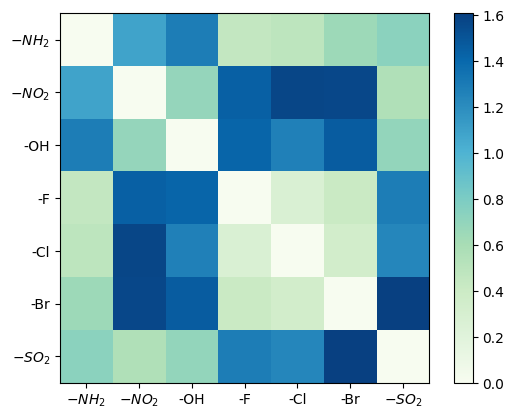

In [571]:
plt.xticks(range(7), labels=func_name)
plt.yticks(range(7), labels=func_name)
plt.imshow(func_matrix, cmap='GnBu', interpolation='nearest')
plt.colorbar()

#plt.savefig("../../../files/final_v/4-func.png", dpi=1200)